In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
df_64 = pd.read_excel('64.xlsx')


In [9]:
df_64 = df_64.drop(columns=['Unit'], axis=0, inplace=False)

In [10]:
collumns = ['Service_Life', 'Avg_Load', 'Load_More_Med', 'Average_Moisture', 'Moist_More_Med',
       'Ave_Vibration', 'Vib_More_Med', 'Ave_Solar_Exposure', 'Solar_More_Med', 'Loc_X',
       'LocX_More_Med', 'Loc_Y', 'LocY_More_Med', 'Censored', 'Infant', 'ExpireType']
df_64.columns = collumns

In [11]:
df_64.describe()

,Service_Life,Avg_Load,Average_Moisture,Ave_Vibration,Ave_Solar_Exposure,Loc_X,Loc_Y,Censored,Infant
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000
mean,270.451563,293.600000,80.639062,52.951875,495.991406,107.028688,651.90000,0.125000,0.484375
std,508.407838,126.711145,14.921260,11.446000,215.966430,93.570016,246.92228,0.333333,0.503706
min,0.000000,112.700000,60.510000,33.360000,66.910000,0.302000,188.50000,0.000000,0.000000
25%,2.700000,191.500000,70.492500,42.785000,342.875000,31.882500,481.22500,0.000000,0.000000
50%,17.950000,275.200000,78.350000,52.710000,453.250000,87.430000,588.90000,0.000000,0.000000
75%,175.050000,353.475000,85.127500,60.445000,618.475000,165.525000,824.15000,0.000000,1.000000
max,1500.000000,715.000000,125.900000,84.250000,1033.000000,430.100000,1214.00000,1.000000,1.000000


<Figure size 1008x576 with 0 Axes>

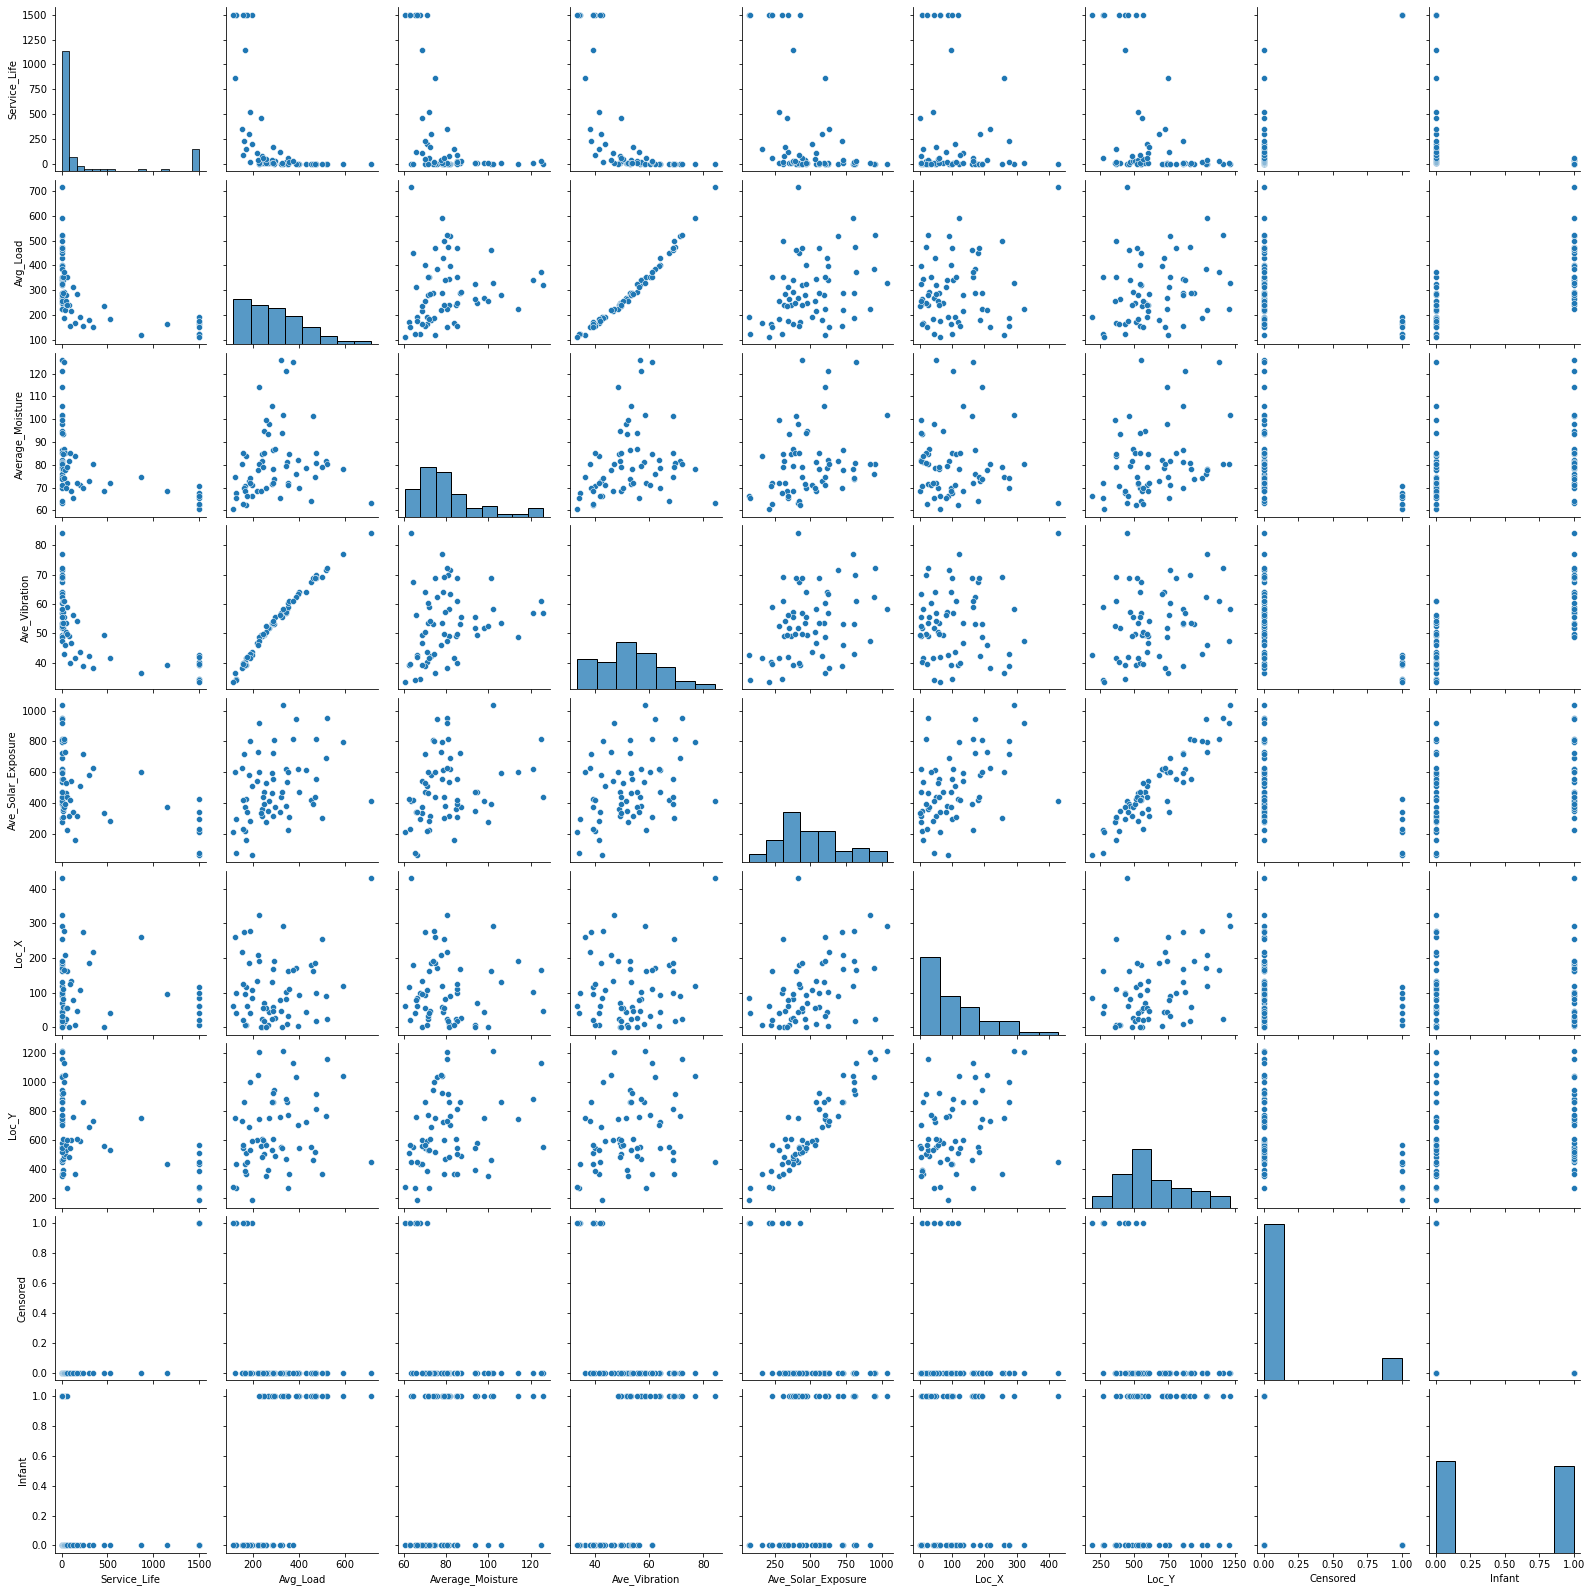

In [12]:
plt.figure(figsize=(14,8))

sns.pairplot(df_64)
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [16]:
x = df_64['Avg_Load']
y = df_64['Service_Life']

In [17]:
x = scaler.fit_transform(x.array.reshape(-1,1))


In [18]:
y = scaler.fit_transform(y.array.reshape(-1,1))

<AxesSubplot:ylabel='Count'>

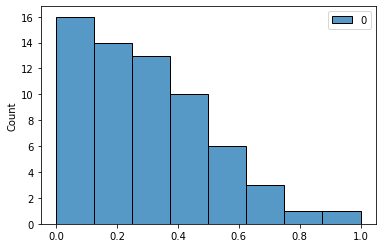

In [19]:
sns.histplot(x)

<AxesSubplot:ylabel='Count'>

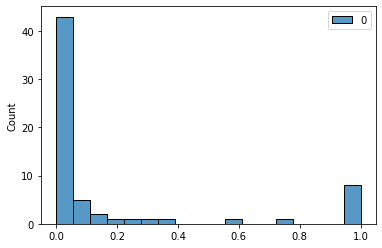

In [20]:
sns.histplot(y)

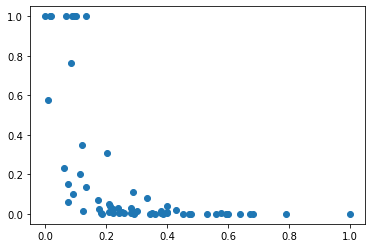

In [21]:
plt.scatter(x,y)
plt.show()

In [22]:
import statsmodels.api as sm

In [23]:
x = sm.add_constant(x)

In [24]:
model = sm.OLS(y,x)
results = model.fit()

In [25]:
print(results.t_test([1,0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.4507      0.062      7.262      0.000       0.327       0.575


In [26]:
df_64['Load_More_Med']

0      gtr
1      gtr
2      gtr
3      gtr
4      gtr
      ... 
59    less
60    less
61    less
62    less
63    less
Name: Load_More_Med, Length: 64, dtype: object

In [95]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [97]:
enc = OrdinalEncoder()
l_enc = LabelEncoder()

x_transformed = enc.fit_transform(enc_data)

In [150]:
x_transformed[0]

array([0., 0., 1., 1., 1., 1., 1.])

In [102]:
enc_data=df_64[['Load_More_Med', 'Moist_More_Med', 
       'Vib_More_Med', 'Solar_More_Med', 
       'LocX_More_Med', 'LocY_More_Med', 
       'ExpireType']]

In [57]:
X = df_64.select_dtypes(include=[object])

In [104]:
df_64[['Load_More_Med', 'Moist_More_Med', 'Vib_More_Med', 
       'Solar_More_Med', 'LocX_More_Med', 'LocY_More_Med', 
       'ExpireType']]= x_transformed

In [105]:
df_64.head()

,Service_Life,Avg_Load,Load_More_Med,Average_Moisture,Moist_More_Med,Ave_Vibration,Vib_More_Med,Ave_Solar_Exposure,Solar_More_Med,Loc_X,LocX_More_Med,Loc_Y,LocY_More_Med,Censored,Infant,ExpireType
0,0.0,715.0,0.0,63.13,0.0,84.25,1.0,412.6,1.0,430.10,1.0,448.4,1.0,0,1,1.0
1,0.0,589.6,0.0,78.02,1.0,76.99,1.0,795.7,0.0,120.70,1.0,1041.0,0.0,0,1,1.0
2,0.2,517.3,0.0,81.66,1.0,71.51,1.0,691.0,0.0,89.23,0.0,768.1,0.0,0,1,1.0
3,0.5,431.5,0.0,78.63,1.0,64.11,1.0,618.0,0.0,45.68,0.0,723.7,0.0,0,1,1.0
4,0.9,400.5,0.0,69.90,0.0,63.94,1.0,471.9,0.0,94.64,0.0,546.6,1.0,0,1,1.0


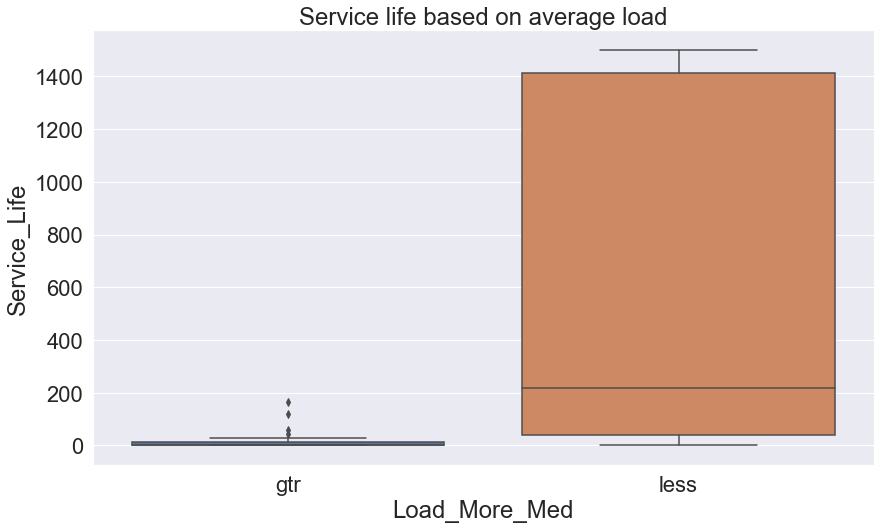

In [39]:
sns.set_theme(font_scale=2)
plt.figure(figsize=(14,8))

sns.boxplot(x=df_64.Load_More_Med, y=df_64.Service_Life)
plt.title('Service life based on average load')
plt.savefig('box_plot_average_load.png')
plt.show()

In [40]:
df_64.describe()

,Service_Life,Avg_Load,Average_Moisture,Ave_Vibration,Ave_Solar_Exposure,Loc_X,Loc_Y,Censored,Infant
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000
mean,270.451563,293.600000,80.639062,52.951875,495.991406,107.028688,651.90000,0.125000,0.484375
std,508.407838,126.711145,14.921260,11.446000,215.966430,93.570016,246.92228,0.333333,0.503706
min,0.000000,112.700000,60.510000,33.360000,66.910000,0.302000,188.50000,0.000000,0.000000
25%,2.700000,191.500000,70.492500,42.785000,342.875000,31.882500,481.22500,0.000000,0.000000
50%,17.950000,275.200000,78.350000,52.710000,453.250000,87.430000,588.90000,0.000000,0.000000
75%,175.050000,353.475000,85.127500,60.445000,618.475000,165.525000,824.15000,0.000000,1.000000
max,1500.000000,715.000000,125.900000,84.250000,1033.000000,430.100000,1214.00000,1.000000,1.000000


In [106]:
X_1 = df_64.loc[df_64['Load_More_Med']==0, 'Service_Life']
X_2 = df_64.loc[df_64['Load_More_Med']==1, 'Service_Life']

In [107]:
df_64.loc[df_64['Load_More_Med']==0, 'Service_Life']

0       0.0
1       0.0
2       0.2
3       0.5
4       0.9
5       1.2
6       1.6
7       2.2
8       2.8
9       3.5
10      4.8
12      7.9
13      9.6
14     11.6
16     20.4
17     25.1
19     43.7
20     59.6
32      0.0
33      0.1
34      0.2
35      0.6
36      1.0
37      1.3
38      1.8
40      3.0
41      4.1
43      6.7
44      8.5
46     12.6
47     15.5
49     28.3
54    120.6
55    165.5
Name: Service_Life, dtype: float64

In [109]:
print(X_1.head())
print(X_2.head())

0    0.0
1    0.0
2    0.2
3    0.5
4    0.9
Name: Service_Life, dtype: float64
11      6.3
15     14.1
18     33.8
21     76.1
22    106.4
Name: Service_Life, dtype: float64


In [110]:
import scipy.stats as stats

In [111]:
f_value, p_value = stats.f_oneway(X_1, X_2)
print(f_value, p_value)

24.95247258221475 5.081219400621824e-06


In [112]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [113]:
model = ols('Service_Life ~ Load_More_Med', data=df_64).fit()

In [114]:
anova_tab = sm.stats.anova_lm(model, typ=2)

In [116]:
print(anova_tab)




                     sum_sq    df          F    PR(>F)
Load_More_Med  4.673010e+06   1.0  24.952473  0.000005
Residual       1.161114e+07  62.0        NaN       NaN


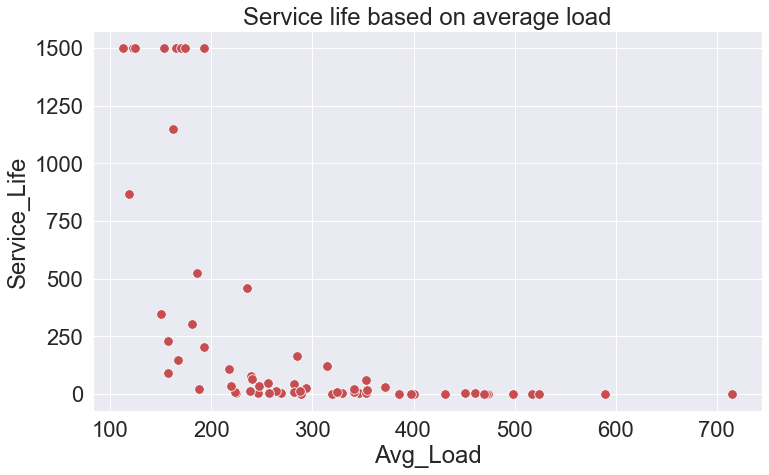

In [117]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=df_64['Avg_Load'], y=df_64['Service_Life'], color='r', s=92)
plt.title('Service life based on average load')
plt.savefig('Scatter_average_load.png')
plt.show()

In [118]:
np.median(df_64['Avg_Load'])

275.2

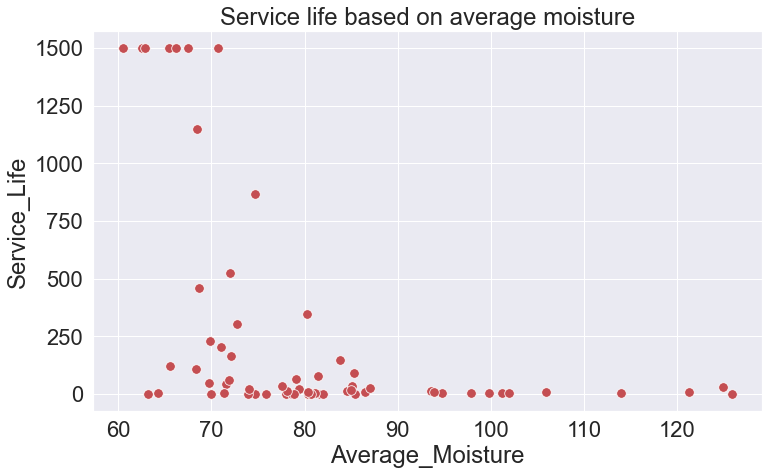

In [120]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=df_64['Average_Moisture'], y=df_64['Service_Life'], color='r', s=92)
plt.title('Service life based on average moisture')
plt.savefig('Scatter_average_moist.png')
plt.show()

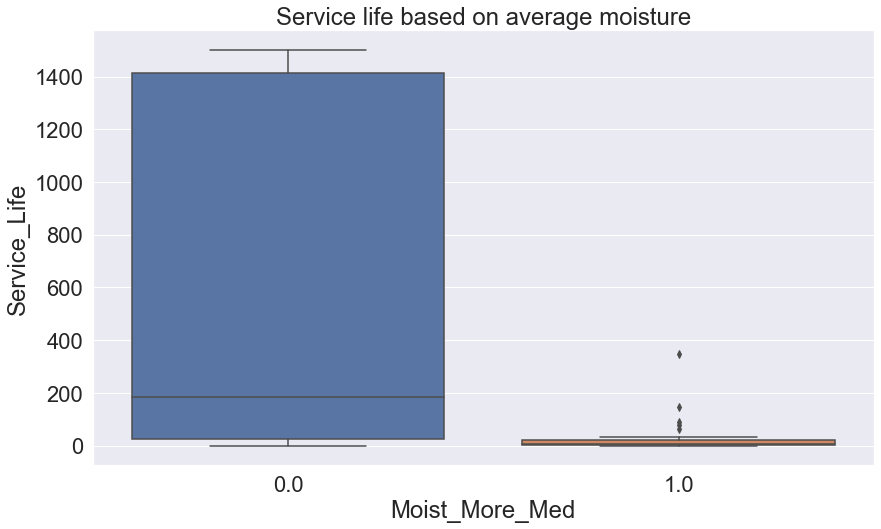

In [121]:
sns.set_theme(font_scale=2)
plt.figure(figsize=(14,8))

sns.boxplot(x=df_64.Moist_More_Med, y=df_64.Service_Life)
plt.title('Service life based on average moisture')
plt.savefig('box_plot_average_moist.png')
plt.show()

In [123]:
model = ols('Service_Life ~ Moist_More_Med', data=df_64).fit()
anova_tab = sm.stats.anova_lm(model, typ=2)
print(anova_tab)


#ANOVA Table: Service life based on level of moisture

                      sum_sq    df          F    PR(>F)
Moist_More_Med  4.253681e+06   1.0  21.921697  0.000016
Residual        1.203047e+07  62.0        NaN       NaN


In [124]:
df_LMH = pd.read_excel('64_with_LMH.xlsx')

In [125]:
df_LMH.head()

,Unit,Service Life,Avg Load,Load L M H,Average Moisture,Moist L M H
0,671,1500.0,112.7,Low,60.51,Low
1,18,1500.0,170.0,Low,62.52,Low
2,951,1500.0,153.1,Low,62.81,Low
3,1221,0.0,715.0,High,63.13,Low
4,1232,2.2,451.2,Med,64.30,Low


In [126]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [127]:
tukey = pairwise_tukeyhsd(endog=df_LMH['Service Life'],
                          groups=df_LMH['Load L M H'],
                          alpha=0.05)

In [128]:
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
  High    Low  436.4859   0.19 -157.4721 1030.4439  False
  High    Med   13.4643    0.9 -603.7191  630.6476  False
   Low    Med -423.0216 0.0043 -729.2303 -116.8129   True
---------------------------------------------------------


In [129]:
tukey = pairwise_tukeyhsd(endog=df_LMH['Service Life'],
                          groups=df_LMH['Moist L M H'],
                          alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
  High    Low  411.7358 0.1282  -90.2066 913.6783  False
  High    Med   17.0667    0.9 -523.4068 557.5401  False
   Low    Med -394.6692 0.0136 -720.0773 -69.2611   True
--------------------------------------------------------


In [130]:
df_169 = pd.read_excel('169.xlsx')

In [138]:
df_169.head()

,Service Life,Avg Load,Average Moisture,Ave Vibration,Ave Solar Exposure,Loc X,Loc Y
0,197.7,242.8,67.95,49.52,394.3,52.62,461.7
1,304.3,180.8,72.71,42.26,584.5,186.90,688.5
2,248.7,142.5,85.07,36.58,316.6,116.10,388.7
3,360.2,265.9,62.86,49.73,314.5,57.63,453.4
4,76.2,346.8,74.51,58.97,186.0,180.10,203.9


In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
lr = LinearRegression()


In [135]:
x = df_169.drop(['Unit'], axis=1,inplace=True)

In [139]:
x =df_169

In [140]:
x.head()

,Service Life,Avg Load,Average Moisture,Ave Vibration,Ave Solar Exposure,Loc X,Loc Y
0,197.7,242.8,67.95,49.52,394.3,52.62,461.7
1,304.3,180.8,72.71,42.26,584.5,186.90,688.5
2,248.7,142.5,85.07,36.58,316.6,116.10,388.7
3,360.2,265.9,62.86,49.73,314.5,57.63,453.4
4,76.2,346.8,74.51,58.97,186.0,180.10,203.9


In [141]:
y = df_169['Service Life']

In [142]:
X = sm.add_constant(x)

/opt/anaconda3/envs/ML_udemy/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [143]:
import statsmodels.api as sm

In [144]:
ols = sm.OLS(y,X).fit()

In [145]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:           Service Life   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.299e+30
Date:                Sun, 09 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:43:09   Log-Likelihood:                 4597.9
No. Observations:                 169   AIC:                            -9180.
Df Residuals:                     161   BIC:                            -9155.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.274e-13    7.6

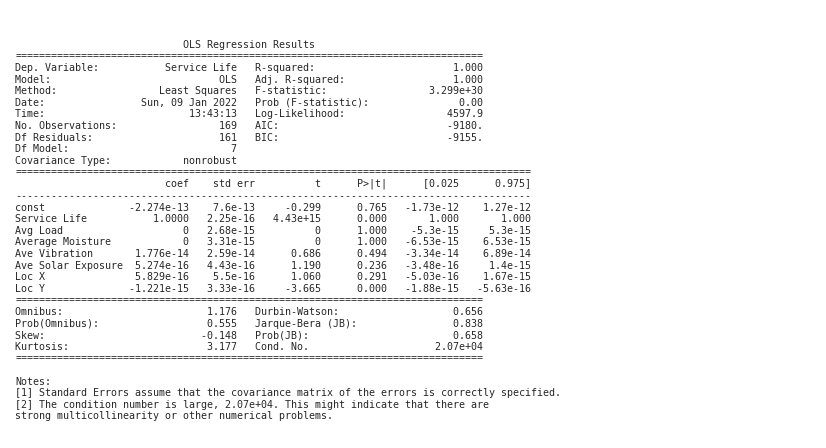

In [146]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(ols.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

In [147]:
print(X.shape)
print(y.shape)

(169, 8)
(169,)


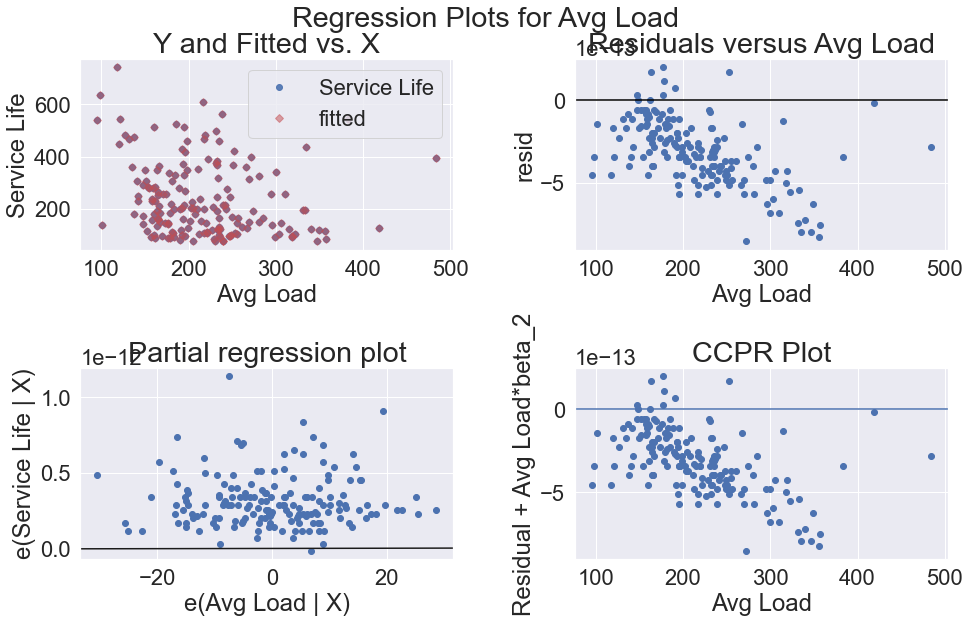

In [148]:
fig = plt.figure(figsize=(14,9))
fig = sm.graphics.plot_regress_exog(ols, 'Avg Load',fig=fig)

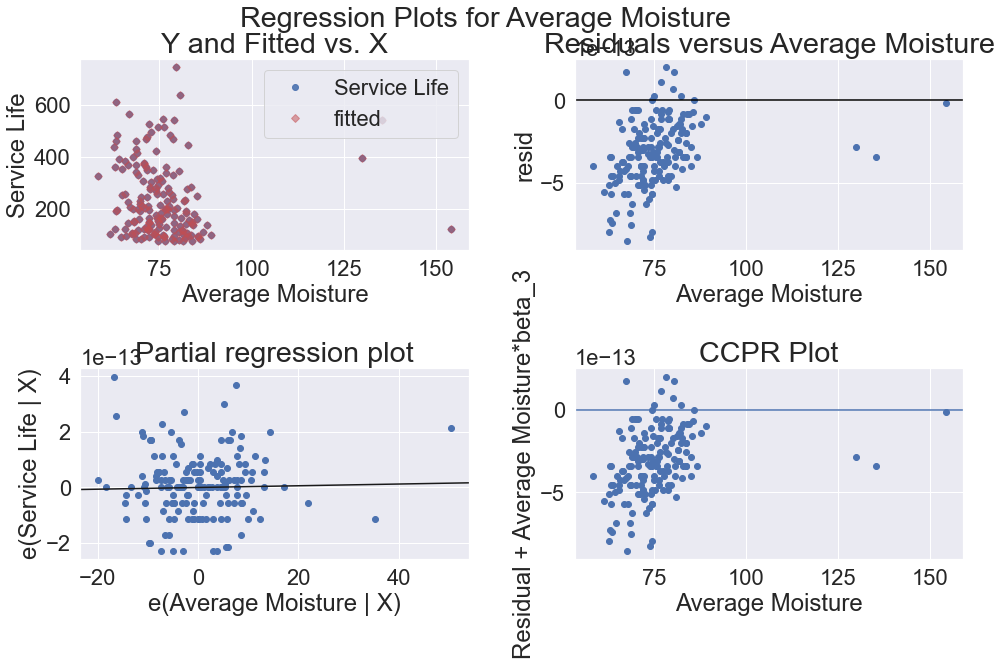

In [149]:
fig = plt.figure(figsize=(14,9))
fig = sm.graphics.plot_regress_exog(ols, 'Average Moisture',fig=fig)

In [297]:
df = pd.read_csv('_eba2c079135882131db3690701bc9c97_PASTAPURCHASE_EDITED.csv')

In [326]:
df.head(40)

,HHID,TIME,PASTA,EXPOS,AGE,INCOME,AREA
0,1,1,0.939444,1,61.710758,25186.798772,3
1,1,2,2.560969,2,61.710758,25186.798772,3
2,1,3,0.901123,0,61.710758,25186.798772,3
3,1,4,1.916530,1,61.710758,25186.798772,3
4,1,5,1.548751,0,61.710758,25186.798772,3
5,1,6,2.169405,0,61.710758,25186.798772,3
6,1,7,2.804702,0,61.710758,25186.798772,3
7,1,8,2.288013,0,61.710758,25186.798772,3
8,1,9,2.263326,0,61.710758,25186.798772,3
9,1,10,1.357010,1,61.710758,25186.798772,3


In [313]:
df.groupby('AREA')['INCOME'].idxmax()

AREA
1    20860
2     3580
3    34420
4    18780
5    19220
Name: INCOME, dtype: int64

In [336]:
df.loc[df.groupby('HHID')['PASTA'].idxmax()].sort_values(by='PASTA', ascending=False)

,HHID,TIME,PASTA,EXPOS,AGE,INCOME,AREA
24216,1211,17,6.592769,2,19.562054,39519.822637,4
35568,1779,9,6.506841,3,28.803388,48308.056808,1
17437,872,18,6.465065,2,29.326458,21856.449592,2
34819,1741,20,6.177753,2,26.499148,20422.305226,4
39376,1969,17,6.109304,1,59.404438,52939.632076,4
...,...,...,...,...,...,...,...
22061,1104,2,2.552075,1,61.561868,15072.559638,1
5336,267,17,2.546558,0,63.151560,12841.476879,5
19023,952,4,2.439594,1,61.537507,37180.108733,4
21104,1056,5,2.401775,0,61.386901,12394.372814,2


In [343]:
df.groupby('AREA', as_index=False)['INCOME'].mean()

,AREA,INCOME
0,1,28076.599968
1,2,26218.857948
2,3,25879.485698
3,4,29260.133137
4,5,26030.910606


In [338]:
(df.groupby(['AREA', 'PASTA'], as_index=True).mean()
            )

HHID  TIME     PASTA  EXPOS        AGE
AREA INCOME                                                 
1    2740.776521    1737.0  10.5  1.438916   0.55  21.983331
     3258.974005    1600.0  10.5  2.101411   0.65  18.289646
     3891.762963     111.0  10.5  1.684128   0.25  37.121997
     4451.249070     751.0  10.5  1.627812   0.45  64.509827
     4650.334332    1754.0  10.5  1.535733   0.40  57.004628
...                    ...   ...       ...    ...        ...
5    72900.459093     40.0  10.5  1.821951   1.05  63.553361
     75354.920768     49.0  10.5  1.764833   0.55  34.763084
     91996.810419    781.0  10.5  1.857792   0.30  29.687777
     107937.989165  1204.0  10.5  1.379174   0.50  63.453315
     141066.966883   962.0  10.5  2.097871   0.55  28.545331

[2000 rows x 5 columns]

In [345]:
df.corr()

,HHID,TIME,PASTA,EXPOS,AGE,INCOME,AREA
HHID,1.000000e+00,1.131062e-15,0.001839,0.001083,-4.972955e-03,-5.802172e-03,3.708490e-02
TIME,1.131062e-15,1.000000e+00,0.004722,0.006750,-1.796533e-16,-1.040947e-17,-4.609596e-18
PASTA,1.838846e-03,4.721510e-03,1.000000,0.326617,-1.377189e-01,-3.694272e-03,5.974411e-03
EXPOS,1.083469e-03,6.750055e-03,0.326617,1.000000,-7.242378e-03,6.200774e-03,1.486882e-03
AGE,-4.972955e-03,-1.796533e-16,-0.137719,-0.007242,1.000000e+00,-6.402286e-04,-2.359163e-02
INCOME,-5.802172e-03,-1.040947e-17,-0.003694,0.006201,-6.402286e-04,1.000000e+00,-8.778957e-03
AREA,3.708490e-02,-4.609596e-18,0.005974,0.001487,-2.359163e-02,-8.778957e-03,1.000000e+00
